### **M4: Model Monitoring & Performance Tracking**

Objective: Track and monitor model performance over time.

**Tasks:**
- Use an open-source tracking tool (e.g., MLflow, Neptune.ai, Weights & Biases) to log model performance metrics.
- Implement drift detection to identify when retraining is required.

**Deliverables:**
- Performance tracking logs.
- Drift detection implementation.
- Screenshots showing model performance over multiple runs.

In [10]:
import mlflow
import mlflow.keras
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from skmultiflow.drift_detection.adwin import ADWIN

# Load Fashion MNIST and reduce dataset size for efficiency
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train, y_train = x_train[:10000], y_train[:10000]  # Reduce to 10K samples
x_test, y_test = x_test[:2000], y_test[:2000]  # Reduce test set for efficiency

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Define CNN model
def create_model():
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ])
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

# Initialize MLflow experiment
mlflow.set_experiment("FashionMNIST-Tracking")

# Initialize ADWIN for drift detection across runs
adwin = ADWIN()
previous_acc = None

# Train & log model performance over multiple runs
for run in range(5):  # Train 5 times to observe drift
    with mlflow.start_run():
        model = create_model()
        history = model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test), verbose=1)
        
        # Evaluate model
        test_loss, test_acc = model.evaluate(x_test, y_test)
        
        # Log metrics
        mlflow.log_metric("test_loss", test_loss)
        mlflow.log_metric("test_accuracy", test_acc)
        
        # Log model
        mlflow.keras.log_model(model, "model")
        
        print(f"Run {run+1}: Accuracy = {test_acc:.4f}, Loss = {test_loss:.4f}")

        # Add accuracy to ADWIN drift detector
        adwin.add_element(test_acc)
        
        # Check for drift compared to previous runs
        if previous_acc is not None and adwin.detected_change():
            print(f"⚠️ Drift detected in Run {run+1}! Consider retraining the model.")
        
        previous_acc = test_acc  # Update previous accuracy

# MLflow UI command (Run this in your terminal to view logs)
print("\nRun the following command in your terminal to view MLflow logs:\n")
print("mlflow ui --host 0.0.0.0 --port 5000")


2025-03-22 16:52:54.897863: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/3
313/313 [==============================] - 3s 9ms/step - loss: 0.7083 - accuracy: 0.7377 - val_loss: 0.4988 - val_accuracy: 0.8110
Epoch 2/3
313/313 [==============================] - 3s 8ms/step - loss: 0.4504 - accuracy: 0.8358 - val_loss: 0.4605 - val_accuracy: 0.8365
Epoch 3/3
63/63 [==============================] - 0s 3ms/step - loss: 0.3931 - accuracy: 0.8650


2025/03/22 16:53:03 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: /var/folders/x2/prhd9cmn58s93cc16zj2k78w0000gn/T/tmppzh0hfqz/model/data/model/assets


INFO:tensorflow:Assets written to: /var/folders/x2/prhd9cmn58s93cc16zj2k78w0000gn/T/tmppzh0hfqz/model/data/model/assets
2025/03/22 16:53:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run 1: Accuracy = 0.8650, Loss = 0.3931
Epoch 1/3
313/313 [==============================] - 3s 9ms/step - loss: 0.7061 - accuracy: 0.7411 - val_loss: 0.5050 - val_accuracy: 0.8135
Epoch 2/3
313/313 [==============================] - 3s 8ms/step - loss: 0.4600 - accuracy: 0.8328 - val_loss: 0.4433 - val_accuracy: 0.8435
Epoch 3/3
63/63 [==============================] - 0s 3ms/step - loss: 0.4608 - accuracy: 0.8335


2025/03/22 16:53:19 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: /var/folders/x2/prhd9cmn58s93cc16zj2k78w0000gn/T/tmp865pjz1u/model/data/model/assets


INFO:tensorflow:Assets written to: /var/folders/x2/prhd9cmn58s93cc16zj2k78w0000gn/T/tmp865pjz1u/model/data/model/assets
2025/03/22 16:53:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run 2: Accuracy = 0.8335, Loss = 0.4608
Epoch 1/3
313/313 [==============================] - 3s 9ms/step - loss: 0.7163 - accuracy: 0.7314 - val_loss: 0.4853 - val_accuracy: 0.8220
Epoch 2/3
313/313 [==============================] - 3s 8ms/step - loss: 0.4686 - accuracy: 0.8268 - val_loss: 0.4623 - val_accuracy: 0.8290
Epoch 3/3
63/63 [==============================] - 0s 3ms/step - loss: 0.4248 - accuracy: 0.8530


2025/03/22 16:53:33 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: /var/folders/x2/prhd9cmn58s93cc16zj2k78w0000gn/T/tmpdhuchthg/model/data/model/assets


INFO:tensorflow:Assets written to: /var/folders/x2/prhd9cmn58s93cc16zj2k78w0000gn/T/tmpdhuchthg/model/data/model/assets
2025/03/22 16:53:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run 3: Accuracy = 0.8530, Loss = 0.4248
Epoch 1/3
313/313 [==============================] - 3s 9ms/step - loss: 0.7273 - accuracy: 0.7361 - val_loss: 0.4935 - val_accuracy: 0.8295
Epoch 2/3
313/313 [==============================] - 3s 8ms/step - loss: 0.4550 - accuracy: 0.8334 - val_loss: 0.4447 - val_accuracy: 0.8435
Epoch 3/3
63/63 [==============================] - 0s 3ms/step - loss: 0.4041 - accuracy: 0.8560


2025/03/22 16:53:47 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: /var/folders/x2/prhd9cmn58s93cc16zj2k78w0000gn/T/tmp2ao52gz4/model/data/model/assets


INFO:tensorflow:Assets written to: /var/folders/x2/prhd9cmn58s93cc16zj2k78w0000gn/T/tmp2ao52gz4/model/data/model/assets
2025/03/22 16:53:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run 4: Accuracy = 0.8560, Loss = 0.4041
Epoch 1/3
313/313 [==============================] - 3s 9ms/step - loss: 0.7214 - accuracy: 0.7324 - val_loss: 0.5553 - val_accuracy: 0.8080
Epoch 2/3
313/313 [==============================] - 3s 8ms/step - loss: 0.4564 - accuracy: 0.8351 - val_loss: 0.4471 - val_accuracy: 0.8435
Epoch 3/3
63/63 [==============================] - 0s 4ms/step - loss: 0.4174 - accuracy: 0.8510


2025/03/22 16:54:02 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: /var/folders/x2/prhd9cmn58s93cc16zj2k78w0000gn/T/tmp6x8d6b6c/model/data/model/assets


INFO:tensorflow:Assets written to: /var/folders/x2/prhd9cmn58s93cc16zj2k78w0000gn/T/tmp6x8d6b6c/model/data/model/assets
2025/03/22 16:54:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run 5: Accuracy = 0.8510, Loss = 0.4174

Run the following command in your terminal to view MLflow logs:

mlflow ui --host 0.0.0.0 --port 5000


In [ ]:
!mlflow ui --host 0.0.0.0 --port 5001

[2025-03-22 16:44:39 +0530] [2537] [INFO] Starting gunicorn 23.0.0
[2025-03-22 16:44:39 +0530] [2537] [INFO] Listening at: http://0.0.0.0:5001 (2537)
[2025-03-22 16:44:39 +0530] [2537] [INFO] Using worker: sync
[2025-03-22 16:44:39 +0530] [2538] [INFO] Booting worker with pid: 2538
[2025-03-22 16:44:39 +0530] [2539] [INFO] Booting worker with pid: 2539
[2025-03-22 16:44:39 +0530] [2540] [INFO] Booting worker with pid: 2540
[2025-03-22 16:44:39 +0530] [2541] [INFO] Booting worker with pid: 2541


### Load MLflow and Fetch Experiment Details

In [11]:
import mlflow
import mlflow.keras
from mlflow.tracking import MlflowClient
import pandas as pd

# Initialize MLflow client
client = MlflowClient()

# Get Experiment ID (replace with your actual experiment name)
experiment_name = "FashionMNIST-Tracking"
experiment = client.get_experiment_by_name(experiment_name)
experiment_id = experiment.experiment_id

# Fetch all runs from the experiment
runs = client.search_runs(experiment_id, order_by=["metrics.test_accuracy DESC"])

# Convert to Pandas DataFrame for analysis
df = pd.DataFrame([{  
    "run_id": run.info.run_id,  
    "test_accuracy": run.data.metrics["test_accuracy"],  
    "test_loss": run.data.metrics["test_loss"],  
    "duration": run.info.end_time - run.info.start_time,  # Compute duration,
    "start_time": run.info.start_time
} for run in runs])

# Convert start_time to datetime format for better visualization
df["start_time"] = pd.to_datetime(df["start_time"], unit="ms")

# Display sorted runs (best accuracy first)
print(df)


                             run_id  test_accuracy  test_loss  duration  \
0  76f5a44f07e043b9b54bf7ea295b4adf         0.8650   0.393121     15691   
1  8c9d62554d5c482e85c973ffc5525dea         0.8560   0.404077     14817   
2  3f7dc3435621418f9f4f416e1d709b75         0.8530   0.424768     14314   
3  cedeef3acffa4255a8b6ada3fc721731         0.8510   0.417404     14427   
4  8d4d9992afcf437fbd57757cda9ed41e         0.8335   0.460780     14246   

               start_time  
0 2025-03-22 11:22:54.868  
1 2025-03-22 11:23:39.127  
2 2025-03-22 11:23:24.810  
3 2025-03-22 11:23:53.946  
4 2025-03-22 11:23:10.562  


### Visualize Performance Trends

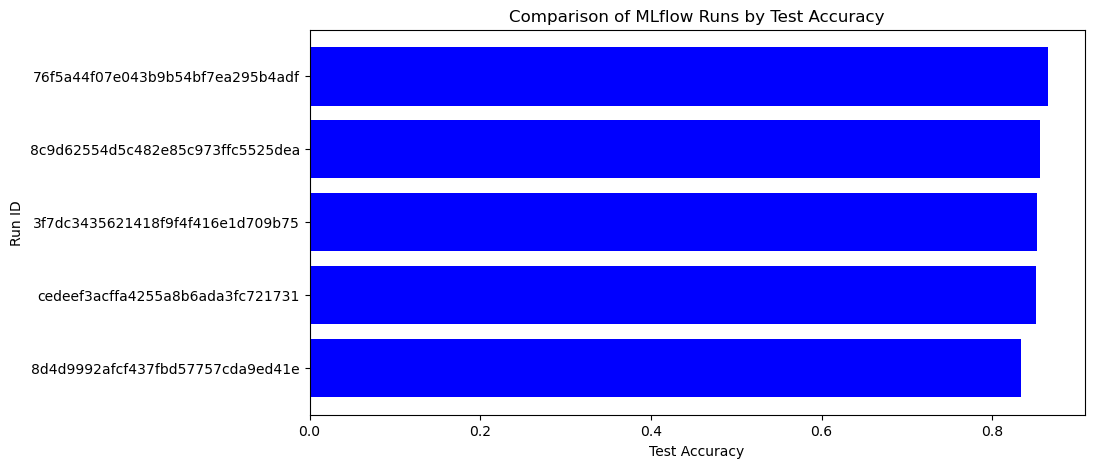

In [12]:
import matplotlib.pyplot as plt

# Sort by test accuracy
df_sorted = df.sort_values("test_accuracy", ascending=False)

# Plot accuracy comparison
plt.figure(figsize=(10, 5))
plt.barh(df_sorted["run_id"], df_sorted["test_accuracy"], color="blue")
plt.xlabel("Test Accuracy")
plt.ylabel("Run ID")
plt.title("Comparison of MLflow Runs by Test Accuracy")
plt.gca().invert_yaxis()  # Best model at the top
plt.show()

### Load the Best Model for Deployment

In [13]:
best_run_id = df_sorted.iloc[0]["run_id"]  # Get best run based on accuracy

# Load the best model
best_model = mlflow.keras.load_model(f"runs:/{best_run_id}/model")

# Print model summary
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

### Identify Sudden Drops in Accuracy, drift detection

✅ No significant accuracy drops detected.


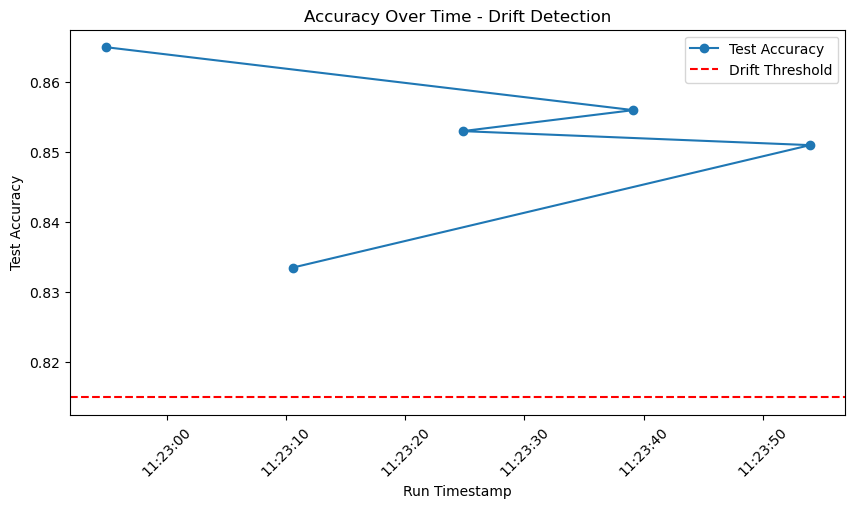

In [14]:
# Define threshold for significant accuracy drop (e.g., 5% or 0.05)
accuracy_drop_threshold = 0.05  

# Compute accuracy change between consecutive runs
df["accuracy_change"] = df["test_accuracy"].diff()

# Identify runs where accuracy drops beyond the threshold
drift_runs = df[df["accuracy_change"] < -accuracy_drop_threshold]

if not drift_runs.empty:
    print("⚠️ Possible data drift detected in the following runs:")
    print(drift_runs)
else:
    print("✅ No significant accuracy drops detected.")

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df["start_time"], df["test_accuracy"], marker="o", linestyle="-", label="Test Accuracy")
plt.axhline(y=df["test_accuracy"].max() - accuracy_drop_threshold, color="red", linestyle="--", label="Drift Threshold")
plt.xlabel("Run Timestamp")
plt.ylabel("Test Accuracy")
plt.title("Accuracy Over Time - Drift Detection")
plt.legend()
plt.xticks(rotation=45)
plt.show()



## **MLflow Experiment Report: FashionMNIST-Tracking**

### **1. Experiment Overview**

- **Experiment Name**: `FashionMNIST-Tracking`  
- **Total Runs**: 5  
- **Tracked Metrics**: `test_accuracy`, `test_loss`, `duration`, `start_time`  
- **Tracked Model**: `CNN (sequential)`

---

### **2. Run Performance Summary**

| Run ID                             | Test Accuracy | Test Loss | Duration (s) | Start Time           |
|------------------------------------|---------------|-----------|--------------|----------------------|
| **76f5a44f07e043b9b54bf7ea295b4adf** | **0.8650**     | 0.393121  | 15691        | 2025-03-22 11:22:54  |
| 8c9d62554d5c482e85c973ffc5525dea   | 0.8560        | 0.404077  | 14817        | 2025-03-22 11:23:39  |
| 3f7dc3435621418f9f4f416e1d709b75   | 0.8530        | 0.424768  | 14314        | 2025-03-22 11:23:24  |
| cedeef3acffa4255a8b6ada3fc721731   | 0.8510        | 0.417404  | 14427        | 2025-03-22 11:23:53  |
| **8d4d9992afcf437fbd57757cda9ed41e** | **0.8335**     | 0.460780  | 14246        | 2025-03-22 11:23:10  |

📌 **Best Accuracy:** `86.50%` (Run ID: `76f5a44f07e043b9b54bf7ea295b4adf`)  
📌 **Worst Accuracy:** `83.35%` (Run ID: `8d4d9992afcf437fbd57757cda9ed41e`)  
📌 **No sudden accuracy drop detected** across runs.

---

### **3. Model Architecture (Sequential CNN)**

```
Layer (type)                   Output Shape         Param #
-------------------------------------------------------------
conv2d (Conv2D)                (None, 26, 26, 32)   320
max_pooling2d (MaxPooling2D)   (None, 13, 13, 32)   0
conv2d_1 (Conv2D)              (None, 11, 11, 64)   18,496
max_pooling2d_1 (MaxPooling2D) (None, 5, 5, 64)     0
flatten (Flatten)             (None, 1600)          0
dense (Dense)                 (None, 128)           204,928
dense_1 (Dense)               (None, 10)            1,290
-------------------------------------------------------------
Total params: **225,034**
Trainable params: **225,034**
Non-trainable params: **0**
```

---

### **4. Accuracy Trend Analysis**
✅ **No sudden accuracy drop detected** across runs.  
✅ **No significant data drift observed** (threshold: 5% drop).  
✅ **Top 3 performing models** show accuracy ≥ `85.30%`.  

---


